In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("NY-House-Dataset.csv")

In [4]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
df.shape

(4801, 17)

In [6]:
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **Wstępna analiza**

In [8]:
df_learning = X_train.join(y_train)

In [9]:
df_learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3840 entries, 735 to 1216
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  3840 non-null   object 
 1   TYPE                         3840 non-null   object 
 2   BEDS                         3840 non-null   int64  
 3   BATH                         3840 non-null   float64
 4   PROPERTYSQFT                 3840 non-null   float64
 5   ADDRESS                      3840 non-null   object 
 6   STATE                        3840 non-null   object 
 7   MAIN_ADDRESS                 3840 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  3840 non-null   object 
 9   LOCALITY                     3840 non-null   object 
 10  SUBLOCALITY                  3840 non-null   object 
 11  STREET_NAME                  3840 non-null   object 
 12  LONG_NAME                    3840 non-null   object 
 13  FORMATTED_ADDRES

In [10]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3.840000e+03
mean,3.319010,2.353901,2167.743168,40.714809,-73.941503,1.929568e+06
std,2.452583,1.842193,2273.175209,0.087687,0.100197,5.160043e+06
min,1.000000,0.000000,230.000000,40.499546,-74.253033,2.494000e+03
25%,2.000000,1.000000,1200.000000,40.639467,-73.986351,4.980000e+05
50%,3.000000,2.000000,2184.207862,40.727758,-73.948622,8.165780e+05
75%,4.000000,3.000000,2184.207862,40.772102,-73.873093,1.495000e+06
max,42.000000,43.000000,65535.000000,40.912729,-73.702450,1.950000e+08


array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>],
       [<AxesSubplot: title={'center': 'LONGITUDE'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

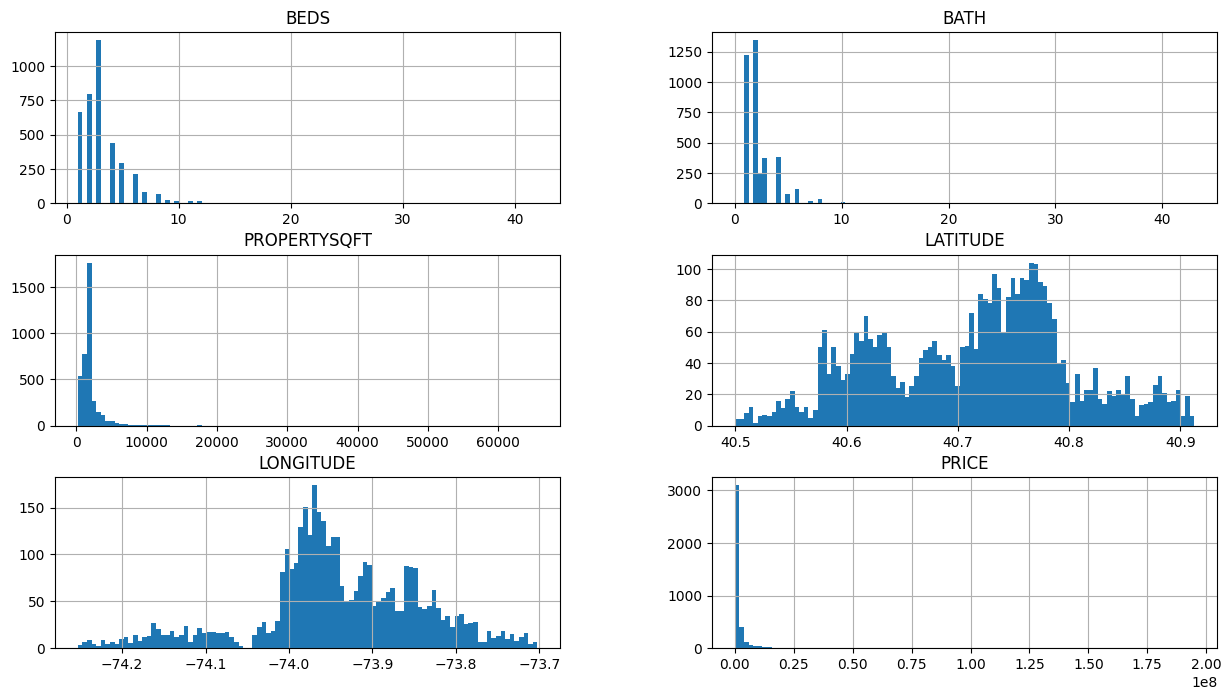

In [11]:
df_learning.hist(bins=100, figsize=(15,8))

array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

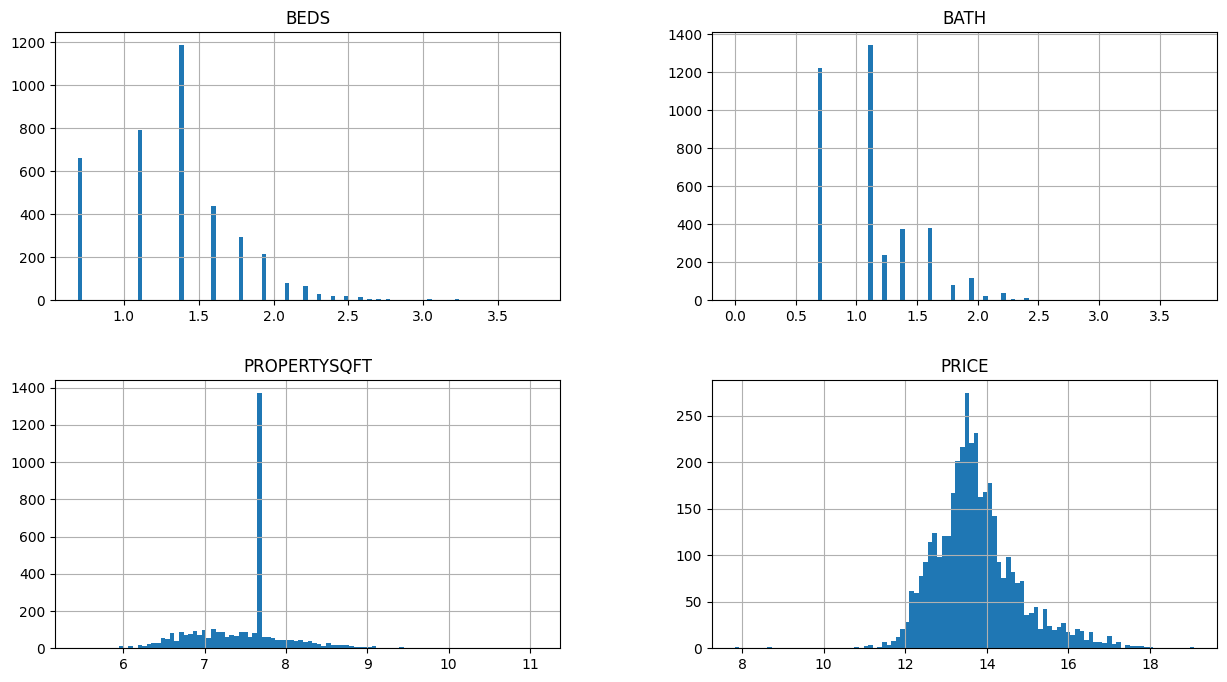

In [22]:
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

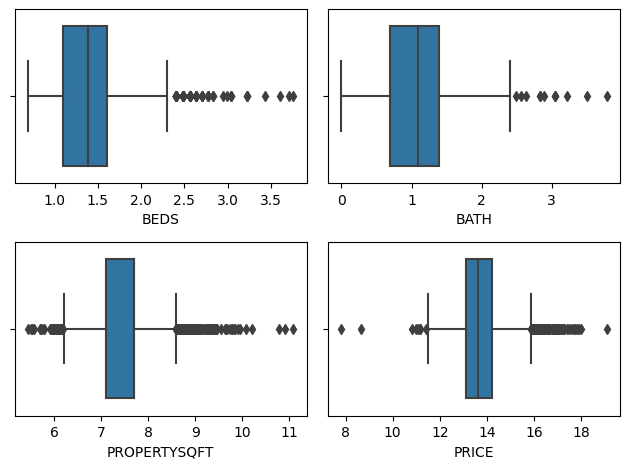

In [13]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

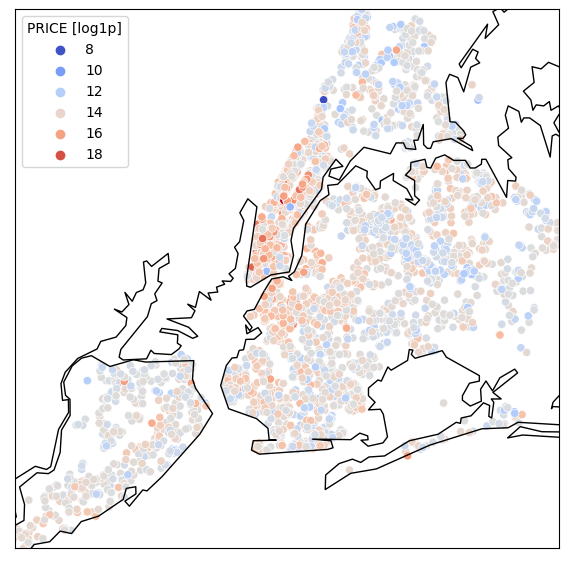

In [31]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()

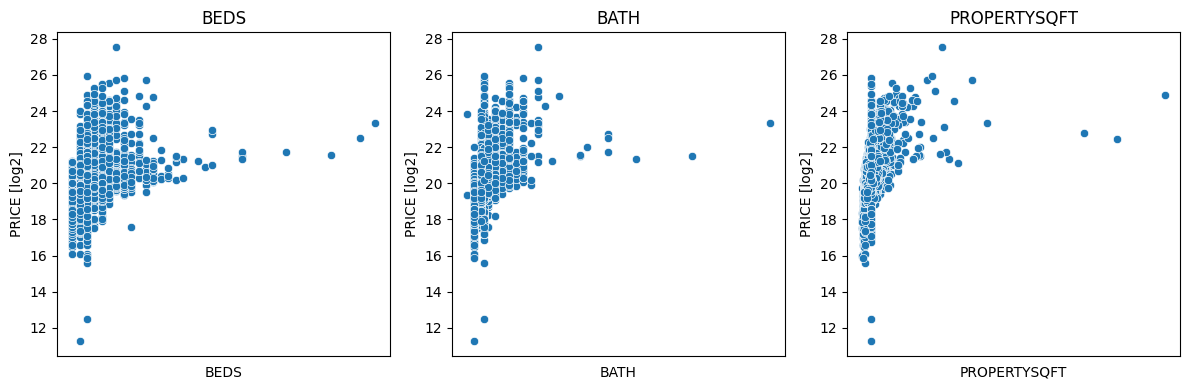

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log2(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])
    axes[i].set_ylabel("PRICE [log2]")

plt.tight_layout()
plt.show()

<AxesSubplot: >

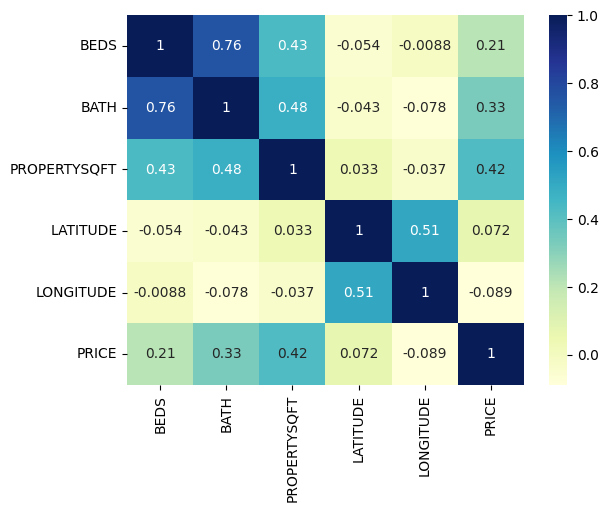

In [16]:
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

In [38]:
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME"]

for col in cols:
    print(df_learning[col].value_counts())
    print(end= "\n________________________________________________________________\n")
    

Brokered by COMPASS                                          368
Brokered by Douglas Elliman - 575 Madison Ave                 90
Brokered by Corcoran East Side                                74
Brokered by Brown Harris Stevens                              72
Brokered by RE MAX Edge                                       64
                                                            ... 
Brokered by Prime Time Real Estate, Inc.                       1
Brokered by Aschan Realty                                      1
Brokered by Metro Real Estate Inc                              1
Brokered by RELIABLE SELL & BUY REALTY INC                     1
Brokered by William Raveis Real Estate - Yorktown Heights      1
Name: BROKERTITLE, Length: 931, dtype: int64

________________________________________________________________
Co-op for sale                1163
House for sale                 800
Condo for sale                 720
Multi-family home for sale     569
Townhouse for sale             245

In [36]:
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME"]

for col in cols:
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    
    df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
    df_count.columns = [col, "count"]
    df_tmp = pd.merge(df_tmp, df_count, on= col).sort_values("MEAN_PRICE", ascending=False).reset_index(drop= True)
    print(df_tmp, end= "\n________________________________________________________________\n")   

                                           BROKERTITLE  MEAN_PRICE  count
0        Brokered by Douglas Elliman - New Development  40000000.0      1
1                                  Brokered by Reserve  32000000.0      1
2           Brokered by EVERGREEN REALTY & INVESTMENTS  31500000.0      1
3    Brokered by Brown Harris Stevens - 43 North Mo...  23000000.0      1
4                       Brokered by New York Residence  12000000.0      1
..                                                 ...         ...    ...
926                  Brokered by Lopez Realty Team Inc    119000.0      1
927         Brokered by Coldwell Banker Signature Prop    115000.0      1
928                   Brokered by Bizzarro Agency, LLC    105000.0      1
929                        Brokered by Exit Realty DKC     97500.0      1
930                  Brokered by HOT HOMES REALTY LLC.     90000.0      1

[931 rows x 3 columns]
________________________________________________________________
                       